# EPA Carbon Monoxide AQI Analysis

## **Introduction**

In this notebook, I will take a deeper look at air quality data from the Environmental Protection Agency (EPA), building on my previous analysis of the Air Quality Index (AQI). You can explore my earlier work here:

 - [GitHub](https://github.com/Cyberoctane29/EPA-Air-Quality-AQI-Analysis): https://github.com/Cyberoctane29/EPA-Air-Quality-AQI-Analysis
 - [Kaggle](https://www.kaggle.com/code/saswatsethda/epa-air-quality-aqi-analysis): https://www.kaggle.com/code/saswatsethda/epa-air-quality-aqi-analysis
 
While my previous project focused on statistical analysis, exploratory data analysis (EDA), and data structures, this notebook expands on that foundation by incorporating statistical methods, probability analysis, outlier detection, sampling techniques, and hypothesis testing. The primary focus is on carbon monoxide levels and their impact on air pollution and public health.

As a member of an analytics team for the United States Environmental Protection Agency (EPA), I have been assigned to analyze air quality data with respect to carbon monoxide, a major air pollutant. The dataset includes information from more than 200 monitoring sites across various states, counties, and cities. By applying statistical techniques, I will explore patterns, detect outliers, and conduct hypothesis testing to generate meaningful insights. These findings will help inform environmental policy decisions, identify regions requiring intervention, and assess how air quality trends impact public health strategies.


## **Overview**  

To achieve this, I will:  

- **Perform descriptive statistics** to summarize air quality data across different regions.  
- **Determine probability distributions** that best fit the dataset and analyze the spread of AQI values.  
- **Detect outliers** using z-scores and other statistical techniques.  
- **Apply effective sampling methods** to optimize analysis on large datasets.  
- **Conduct hypothesis tests** to assess differences in AQI across locations, helping guide policy decisions.  
- **Visualize key trends** in air pollution data using graphs and charts to enhance interpretability.  

By carrying out these analyses, I aim to identify **which regions require intervention**, understand **how air quality trends impact public health**, and provide **data-driven insights to support environmental policies**.


## **Dataset Structure**  

### **Air Quality Datasets**  
These datasets contain air quality data collected by the Environmental Protection Agency (EPA), specifically focusing on **carbon monoxide** levels across multiple locations in the United States. The data comes from over 200 monitoring sites, each identified by state, county, city, and local site names. The datasets provide key information for analyzing air pollution trends and their potential public health impacts.

#### **Dataset 1-c4_epa_air_quality.csv: Air Quality Measurements**  
This dataset contains raw air quality data, including:  
- **date_local**: The date when the air quality measurement was recorded.  
- **state_name**: The U.S. state where the air quality was measured.  
- **county_name**: The county where the monitoring site is located.  
- **city_name**: The city (if applicable) where the air quality was recorded.  
- **local_site_name**: The name of the specific monitoring station.  
- **parameter_name**: The pollutant measured, which in this case is carbon monoxide.  
- **units_of_measure**: The unit used for measurement (Parts per million).  
- **arithmetic_mean**: The average concentration of carbon monoxide for the given date and location.  
- **aqi**: The Air Quality Index (AQI) value derived from the carbon monoxide concentration.  

#### **Dataset 2-c4_epa_air_quality.csv: Log-Transformed AQI Data**  
This dataset contains a **log-transformed** version of the AQI values, which helps in analyzing data distribution and handling skewness in air pollution measurements. It includes:  
- **date_local, state_name, county_name, city_name, local_site_name, parameter_name, units_of_measure** (same as Dataset 1).  
- **aqi_log**: The natural logarithm of the AQI value for improved statistical analysis.  

By using these datasets, this notebook will **analyze air pollution trends, detect outliers, apply hypothesis testing, and provide insights into environmental policies aimed at improving air quality.**  


## Importing Required Libraries
Before beginning the analysis, it is essential to import all necessary libraries. 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Exploring Air Quality Through Descriptive Statistics

### **Introduction**  

In this section, I utilize descriptive statistics to analyze and summarize air quality data from the United States Environmental Protection Agency (EPA), uncovering patterns and trends that support informed decision-making on environmental policies and public health initiatives. By employing Python libraries such as **pandas** and **numpy**, I compute key statistical measures—including **mean, median, standard deviation, and percentiles**—to understand the central tendencies and variability of AQI values. Through this exploration, I emphasize the crucial role of descriptive statistics in data interpretation and effective communication of findings.


I will load the dataset and display a sample of the data.


In [48]:
epa_data = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\EPA-Carbon-Monoxide-AQI-Analysis\Data\c4_epa_air_quality.csv", index_col = 0)

To understand how the dataset is structured, I display the first 10 rows of the data.

In [49]:
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


### Understanding the AQI Column

The `aqi` column in the dataset represents the **Air Quality Index (AQI)**, which measures air pollution levels. It helps assess potential health impacts, with higher values indicating poorer air quality. The AQI is based on measurements of pollutants like particulate matter, ozone, carbon monoxide, sulfur dioxide, and nitrogen dioxide.

To gain more insights, I use the `info()` function:

In [50]:
epa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        260 non-null    object 
 1   state_name        260 non-null    object 
 2   county_name       260 non-null    object 
 3   city_name         260 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    260 non-null    object 
 6   units_of_measure  260 non-null    object 
 7   arithmetic_mean   260 non-null    float64
 8   aqi               260 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 20.3+ KB


This provides details on the dataset’s structure, including data types and missing values.

Next, I generate a table of descriptive statistics using the `describe()` function:

In [51]:
epa_data.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


#### Observations:

- The **count value** for the **aqi** column is **260**, indicating that there are **260 recorded AQI measurements** in the dataset. This suggests that the data represents **260 individual air quality observations**, likely corresponding to different time points or locations.  
- The **25th percentile** for the **aqi** column is **2**, meaning that **25% of the AQI values in the dataset are below this threshold**. This percentile provides insight into the **lower range of air quality**, indicating that a significant portion of the data falls within the lower AQI values, which may correspond to **better air quality**.  
- The **75th percentile** for the **aqi** column is **9**, meaning that **75% of the AQI values in the dataset fall below this value**. This indicates that **the majority of air quality measurements are concentrated within the lower range**, suggesting **relatively lower pollution levels** for a large portion of the data.  


### Analyzing AQI Across States
To analyze the distribution of AQI across states, I use:

In [52]:
epa_data['state_name'].describe()


count            260
unique            52
top       California
freq              66
Name: state_name, dtype: object

#### Key Insights:
- There are **260 entries** in the dataset for the state column, with **52 unique states**.
- **California appears most frequently (66 times)**, indicating that a significant portion of air quality data is collected from this state, possibly due to higher pollution levels or more monitoring stations.

### Statistical Analysis of AQI
To understand central tendencies and dispersion, I calculate key statistical metrics for the AQI column.

#### Mean AQI:


In [53]:
np.mean(epa_data["aqi"])


np.float64(6.757692307692308)

- The mean **AQI is approximately 6.76**, indicating that, on average, the air quality index in this dataset remains within the safe range.

#### Median AQI:

In [54]:
np.median(epa_data["aqi"])


np.float64(5.0)

- The median **AQI is 5**, which confirms that most air quality readings are relatively low.
- Since the mean is slightly higher than the median, the AQI values may be slightly *right-skewed*.

#### Minimum AQI (Best Recorded Air Quality):

In [55]:
np.min(epa_data["aqi"])

np.int64(0)

- The minimum **AQI value is 0**, representing the cleanest air observed in the dataset.


#### Maximum AQI (Worst Recorded Air Quality):

In [56]:
np.max(epa_data["aqi"])

np.int64(50)

- The maximum **AQI value is 50**, which is still well below the threshold of 100, indicating that even the worst recorded air quality remains within the safe range.

#### Standard Deviation of AQI:

Now, I will compute the **standard deviation** for the `aqi` column.

By default, the **numpy** library uses **0** as the **Delta Degrees of Freedom (ddof)**, while the **pandas** library uses **1**. To obtain the same standard deviation value using either library, I will specify the `ddof` parameter as **1** when performing the calculation.


In [57]:
np.std(epa_data["aqi"], ddof=1)


np.float64(7.061706678820724)

The s**tandard deviation is approximately 7.06**, indicating moderate variability in AQI values across the dataset.

### Key Takeaways  

- The **pandas** and **numpy** libraries provide powerful functions for computing descriptive statistics.  
- The **describe()** function in pandas provides a comprehensive summary of numerical or categorical columns.  
- Functions like **mean()**, **median()**, **min()**, **max()**, and **std()** in numpy allow for precise calculation of individual statistics.  

### Summary of Findings  

- The **arithmetic_mean** and **aqi** columns are **slightly right-skewed**.  
- The **range** of **arithmetic_mean** is **1.9**, while the **range** of **aqi** is **50**.  
- The **median values** are **0.276** (arithmetic_mean) and **5** (aqi).  
- The **standard deviations** are **0.3** for arithmetic_mean and **7.06** for aqi.  
- The **mean values** are **0.4** (arithmetic_mean) and **6.57** (aqi).  
- These insights suggest that **arithmetic_mean has less variability**, while **AQI shows moderate variability** in the dataset.  


### Presentation of Findings to Others  
To effectively present the findings to others, I would highlight key AQI statistics and relate them to air quality standards provided by AirNow.gov.  

- The **average AQI value** in this dataset is approximately **6.76**, which falls well within the **"safe" range**.  
- **75% of the AQI values** are below **9**, indicating that most of the data represents **satisfactory air quality**.  
- The **AQI values** in this dataset **do not exceed 50**, which is significantly below the threshold of **100**. This implies that **even for sensitive groups, the air quality is considered safe**.  
- For **carbon monoxide**, an **AQI of 50** corresponds to **4.7 parts per million (ppm)**, which is well below the **harmful level of 9.4 ppm** associated with an AQI of **100**.  


### Summary for Stakeholders  
To provide stakeholders with a clear summary, I would focus on key descriptive statistics and their implications:  

- **AQI Range and Distribution**: The AQI values range from **0 to 50**, with **75% of the values below 9**. This suggests that the air quality is predominantly within the **"good" range**, as defined by AirNow.gov.  
- **Central Tendency**: The **mean AQI is 6.76**, reflecting **satisfactory air quality**. Additionally, the **median AQI is 5**, showing that most values are clustered toward the lower end of the range.  
- **Variability**: The **standard deviation of AQI is 7.06**, indicating **moderate variability** in air quality measurements across the dataset.  
- **Interpretation for Stakeholders**: All AQI values in the dataset are **well below 100**, meaning the air quality is **safe even for sensitive groups**. For carbon monoxide, an **AQI of 50 corresponds to 4.7 ppm**, which is **significantly below the harmful level of 9.4 ppm** associated with an AQI of **100**.  

### Actionable Insight  
While this dataset indicates **safe air quality**, **funding could be allocated to monitor regions showing higher AQI values (closer to 50)**. This would ensure **proactive efforts** in maintaining and improving air quality, particularly for **sensitive groups**.  



## Understanding and Analyzing Probability Distribution

### **Introduction**  

In this section, I explore probability distributions to assess air quality data from the United States Environmental Protection Agency (EPA). Understanding probability distributions is crucial for analyzing how data behaves, identifying patterns, and detecting anomalies. By applying the empirical rule and computing z-scores, I determine whether air quality follows a normal distribution and identify potential outliers. The dataset includes log-transformed AQI readings (aqi_log) to better approximate a normal distribution, aiding in statistical analysis.

 I load the dataset, which is a subset of the EPA’s air quality data, transformed for this analysis.


In [58]:
data = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\EPA-Carbon-Monoxide-AQI-Analysis\Data\modified_c4_epa_air_quality.csv")

## **Exploring the Data**  

To understand the dataset structure, I display the first 10 rows:


In [59]:
data.head(10)


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The dataset includes a **log-transformed AQI column (`aqi_log`)**, which is useful for evaluating normality. I also check the number of rows and columns:  


In [60]:
data.shape


(260, 8)

### **Visualizing the Distribution of AQI Data**  

To analyze how `aqi_log` is distributed, I generate a histogram:  


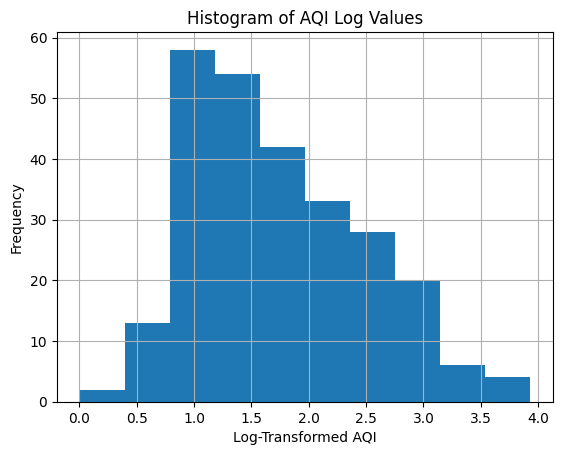

In [61]:
data['aqi_log'].hist()
plt.xlabel('Log-Transformed AQI')
plt.ylabel('Frequency')
plt.title('Histogram of AQI Log Values')
plt.show()

#### **Observation**  
The histogram shows that the **distribution is slightly right-skewed** but retains an approximately **bell-shaped curve**, indicating that the data is **approximately normal**.

## **Applying the Empirical Rule**  

The **empirical rule** states that for a normal distribution:  
- **68%** of data falls within **1 standard deviation** of the mean.  
- **95%** falls within **2 standard deviations** of the mean.  
- **99.7%** falls within **3 standard deviations** of the mean.  

First, I calculate the **mean and standard deviation** of `aqi_log`:  

In [62]:
aqi_mean = data['aqi_log'].mean()
aqi_std = data['aqi_log'].std()
print(f"Mean: {aqi_mean}, Standard Deviation: {aqi_std}")

Mean: 1.7669210929985582, Standard Deviation: 0.7147155520223721


### **Checking the Empirical Rule for 1 Standard Deviation**  

I define the lower and upper limits:  


In [63]:
lower_limit = aqi_mean - aqi_std
upper_limit = aqi_mean + aqi_std
print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")

Lower Limit: 1.052205540976186, Upper Limit: 2.4816366450209304


Then, I calculate the **percentage of data within 1 standard deviation**:  


In [64]:
within_1_std = ((data['aqi_log'] >= lower_limit) & (data['aqi_log'] <= upper_limit)).mean() * 100
print(f"Percentage within 1 standard deviation: {within_1_std}%")

Percentage within 1 standard deviation: 76.15384615384615%


### **Checking the Empirical Rule for 2 Standard Deviations**  

I extend the range to **2 standard deviations**:  


In [65]:
lower_limit1 = aqi_mean - 2 * aqi_std
upper_limit1 = aqi_mean + 2 * aqi_std
print(f"Lower Limit: {lower_limit1}, Upper Limit: {upper_limit1}")

Lower Limit: 0.3374899889538139, Upper Limit: 3.1963521970433026


Then, I compute the **percentage of data within 2 standard deviations**:  


In [66]:
within_2_std = ((data['aqi_log'] >= lower_limit1) & (data['aqi_log'] <= upper_limit1)).mean() * 100
print(f"Percentage within 2 standard deviations: {within_2_std}%")

Percentage within 2 standard deviations: 95.76923076923077%


### **Checking the Empirical Rule for 3 Standard Deviations**  

I extend the range further to **3 standard deviations**:  

In [67]:
lower_limit2 = aqi_mean - 3 * aqi_std
upper_limit2 = aqi_mean + 3 * aqi_std
print(f"Lower Limit: {lower_limit2}, Upper Limit: {upper_limit2}")

Lower Limit: -0.37722556306855815, Upper Limit: 3.9110677490656744


Then, I calculate the **percentage of data within 3 standard deviations**:  


In [68]:
within_3_std = ((data['aqi_log'] >= lower_limit2) & (data['aqi_log'] <= upper_limit2)).mean() * 100
print(f"Percentage within 3 standard deviations: {within_3_std}%")

Percentage within 3 standard deviations: 99.61538461538461%



#### **Empirical Rule Results:**  
- **76.15%** of the data falls within **1 standard deviation** of the mean.  
- **95.77%** falls within **2 standard deviations** of the mean.  
- **99.62%** falls within **3 standard deviations** of the mean.  
  
While the **2 and 3 standard deviation percentages closely match the expected values (95% and 99.7%)**, the **1 standard deviation percentage (76.15%) is higher than the expected 68%**, suggesting **a slight deviation from normality**.  

## **Identifying Outliers Using Z-Scores**  


A **z-score** measures how many standard deviations a data point is from the mean. **Outliers typically have z-scores beyond ±3.**  

I calculate the **z-score for each AQI log value**:  

In [69]:
data["z_score"] = stats.zscore(data["aqi_log"], ddof=1)
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050,1.316788
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612,-0.935070
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612,-0.935070
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759,0.034753
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910,0.250434


### **Detecting Outliers**  

I filter for values where the **z-score is greater than 3 or less than -3**:  

In [70]:
outliers = data[(data["z_score"] > 3) | (data["z_score"] < -3)]
outliers

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


#### **Observation on Outliers:**  
- The **West Phoenix site** has an **aqi_log of 3.93** with a **z-score of 3.02**, which **exceeds the +3 threshold**.  
- This suggests **significantly higher air pollution** compared to other locations.  
- **West Phoenix is an outlier and may require additional investigation.**  

## **Key Takeaways**  

- **Visualizing the histogram** helps assess whether the data follows a normal distribution.  
- The **empirical rule** effectively confirms **approximate normality** in the dataset.  
- **Z-scores** allow for easy identification of **outliers**.  
- **West Phoenix stands out as an air quality outlier**, warranting further research.  

## **Summary for Stakeholders**  

- The **log-transformed AQI data approximates a normal distribution**, making it more suitable for statistical analysis.  
- **West Phoenix is an outlier**, with an **aqi_log of 3.93 and a z-score of 3.02**, indicating **significantly higher air pollution levels** compared to other locations.  
- **76.15% of AQI values fall within one standard deviation**, which is **higher than the expected 68%**, suggesting a **slightly more concentrated distribution** around the mean.


**_________________*________________**
use for last section
 By leveraging statistical analysis and probability distributions, I can **identify regions requiring attention** and help guide **data-driven environmental policies**. 

 - **Potential next steps**: Additional **funding and policy measures** could be allocated to West Phoenix to improve air quality.  